<a href="https://colab.research.google.com/github/paritoshkc/Computer-Vision-Project/blob/master/CV_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(60000,)
(60000, 784)
(5421, 784)


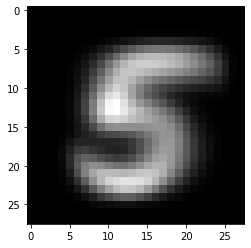

dim>num_data 784 5421
asdsad (5421,) (5421, 5421)
eigen value [-3.8401648e+02 -5.7070946e+01 -5.0562027e+01 ...  1.1613823e+09
  1.5962971e+09  2.8048750e+09]
5421


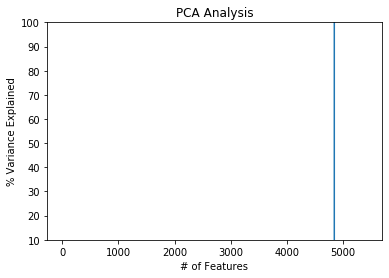

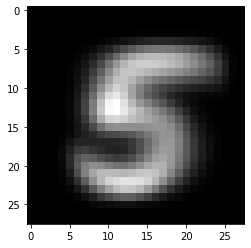

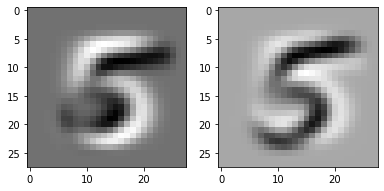

In [25]:
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np

from PIL import Image
from numpy import *
from pylab import *
from sklearn.decomposition import PCA


def show_images(X_img):
  w=10
  h=10
  fig=plt.figure(figsize=(20, 20),constrained_layout=False)
  columns = 10
  rows = 1
  for i in range(1, columns*rows +1):
      #img = np.random.randint(10, size=(h,w))
      fig.add_subplot(rows, columns, i)
      plt.imshow(X_img[i].reshape(28, 28), cmap = plt.cm.gray, interpolation='nearest', clim=(0, 255))
      #plt.subplots_adjust(wspace=01, hspace=0.001)
  plt.show()





def pca(X):
  
# """ Principal Component Analysis
# input: X, matrix with training data stored as flattened arrays in rows
# return: projection matrix (with important dimensions first), variance and mean.
# """
# get dimensions
  num_data,dim = X.shape
  print(X.shape)
# center data
  mean_X = X.mean(axis=0)
  figure()
  image = np.array(mean_X, dtype='float')   
  pixels = image.reshape((28,28))  
  
  plt.imshow(pixels, cmap='gray')   
  plt.show()
  figure()
    
  X = X - mean_X
  print('dim>num_data',dim,num_data)
  # PCA - compact trick used
  M = dot(X,X.T) # covariance matrix
  e,EV = linalg.eigh(M) # eigenvalues and eigenvectors
  plt.ylabel('% Variance Explained')
  plt.xlabel('# of Features')
  plt.title('PCA Analysis')
  plt.ylim(10,100)
  plt.style.context('seaborn-whitegrid')
  var=np.cumsum(np.round(e, decimals=3)*100)

  plt.plot(var)
  print('asdsad',e.shape,EV.shape)
  print('eigen value',e)
  tmp = dot(X.T,EV).T # this is the compact trick
  V = tmp[::-1] # reverse since last eigenvectors are the ones we want
  S = e[::-1] # reverse since eigenvalues are in increasing order
  for i in range(V.shape[1]):
    V[:,i] /= S
  return V,S,mean_X


    
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(y_train.shape)
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],num_pixels)
X_test = X_test.reshape(X_test.shape[0],num_pixels)
print(X_train.shape)
train_filter = np.where(y_train == 5 )
X_test_5=X_train[train_filter]


# create matrix to store all flattened images
immatrix = np.array(X_test_5,'f')
V,S,immean = pca(immatrix)
# show some images (mean and 7 first modes)
mean_img_5=immean
print(len(S))
figure()
gray()
#subplot(2,4,1)
immean = np.array(immean, dtype='float')
imshow(immean.reshape(28,28))
fig=plt.figure(figsize=(20, 20),constrained_layout=False)
for i in range(2):
  subplot(2,6,i+2)
  
  plt.imshow(V[i].reshape(28,28),cmap = plt.cm.gray)
#show_images(V)
  
  
# print("THG", X_test_5.size)
# for i in range(0,X_test_5.size):   
#    image = X_test_5[i]   
#    image = np.array(image, dtype='float')   
#    pixels = image.reshape((28,28))  
#    plt.imshow(pixels, cmap='gray')   
#    plt.show()

(60000,)
      principal component 1  principal component 2
0                181.650422            -538.983174
1              -1057.195549             921.086924
2               -976.890732             401.086815
3               -963.077412            -362.272854
4               -995.773276             967.714793
...                     ...                    ...
5416            -959.804380             746.763961
5417           -1098.072007             446.807615
5418            -482.491337              95.438860
5419            -667.156852             244.223788
5420              72.791936            -583.309509

[5421 rows x 2 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



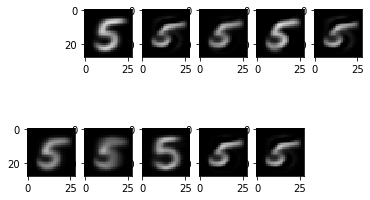

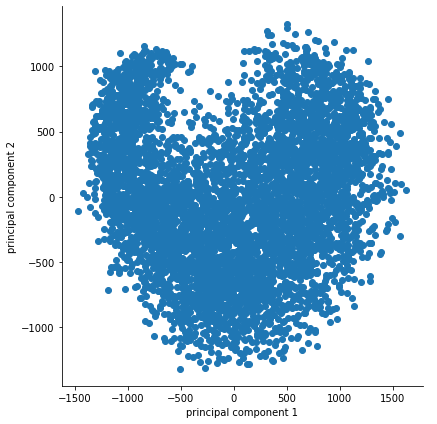

In [26]:
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np

from PIL import Image
from numpy import *
from pylab import *
from sklearn.decomposition import PCA
import pandas as pd

import plotly.graph_objs as go
import plotly.offline as py
from sklearn.preprocessing import StandardScaler

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(y_train.shape)
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],num_pixels)
X_test = X_test.reshape(X_test.shape[0],num_pixels)

train_filter = np.where(y_train == 5 )

scaler = StandardScaler()
X_test_5=X_train[train_filter]
#Fit on training set only.
#X_test_5 = scaler.fit_transform(X_test_5)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_test_5)

approximation = pca.inverse_transform(principalComponents)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
print(principalDf)


for i in range(10):
  
  subplot(2,6,i+2)
  plt.imshow(approximation[i].reshape(28, 28),cmap = plt.cm.gray, interpolation='nearest',clim=(0, 255));
  #plt.xlabel('154 components', fontsize = 14)
# layout=go.Layout(title='PCA',
#                 hovermode='closest',
#                 xaxis=dict(
#                     title='First principal direction',
#                     ticklen=5,
#                     zeroline=False),
#                  yaxis=dict(
#                  title='Second principal direction',
#                  ticklen=5
#             ),
#                  showlegend=True
                
                    
#                 )
# fig=dict(data=[principalDf],layout=layout)
# py.iplot(fig,filename='pca')
import seaborn as sn
sn.FacetGrid(principalDf, size=6).map(plt.scatter, 'principal component 1', 'principal component 2').add_legend()
plt.show()

(5421,)
(5421, 784)
(892,)
(892, 784)


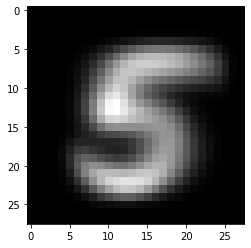

10


<Figure size 432x288 with 0 Axes>

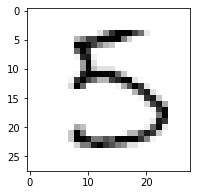

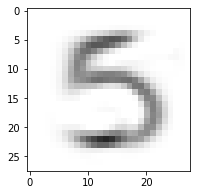

xxxx float64


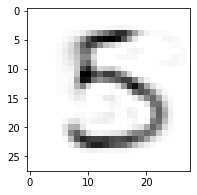

(28, 28)
image here


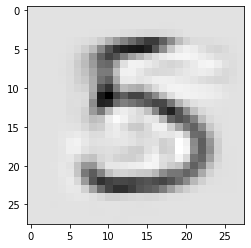

(892, 784)


<Figure size 432x288 with 0 Axes>

In [27]:
from PIL import Image
from numpy import *
from pylab import *
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt
from keras.datasets import mnist


import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec




def show_images(X_img):
  w=10
  h=10
  fig=plt.figure(figsize=(3,3),constrained_layout=False)
  columns = 1
  rows = 1
  for i in range(1, columns*rows +1):
      #img = np.random.randint(10, size=(h,w))
      fig.add_subplot(rows, columns, i)
      plt.imshow(X_img[i].reshape(28, 28),cmap = 'Greys', interpolation='nearest', clim=(0, 255))
      #plt.subplots_adjust(wspace=01, hspace=0.001)
  plt.show()

(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],num_pixels)
X_test = X_test.reshape(X_test.shape[0],num_pixels)

train_filter = np.where(y_train == 5  )
test_filter = np.where(y_test == 5  )
#scaler = StandardScaler()
X_train,y_train=X_train[train_filter],y_train[train_filter]
X_test,y_test=X_test[test_filter],y_test[test_filter]

print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)


mean_X = X_train.mean(axis=0)
figure()
image = np.array(mean_X, dtype='float')   

pixels = image.reshape((28,28))  
plt.imshow(pixels, cmap='gray')   
plt.show()
figure()
#X = scaler.fit_transform(X_test_5)
pca = PCA(n_components=10)
print(pca.n_components)
lower_dimensional_data = pca.fit_transform(X_train)
test_10_trans=pca.transform(X_test)
approximation = pca.inverse_transform(test_10_trans)
#plt.subplots(2, 10, figsize=(10,2.5),subplot_kq={'xticks':[],'yticks':[]});

#plt.imshow(approximation[1].reshape(28, 28),cmap = plt.cm.gray, interpolation='nearest', clim=(0, 255));
#figure()
show_images(X_test)
show_images(approximation)
pca = PCA(n_components=50)
lower_dimensional_data = pca.fit_transform(X_train)
test_50_trans=pca.transform(X_test)
approximation = pca.inverse_transform(test_50_trans)
print('xxxx', approximation.dtype)
t_im=approximation.reshape(892,28,28)
show_images(approximation)
print(t_im[1].shape)
print('image here')
figure()
plt.imshow(t_im[1], cmap='Greys')   
plt.show()
figure()
print(approximation.shape)
#fig=plt.figure(figsize=(8, 8),constrained_layout=False)
#outer_grid = fig.add_gridspec(4, 4, wspace=0.0, hspace=0.0)

# for i in range(10):
#   subplot(1,15,i+5)
  # plt.imshow(X[i].reshape(28, 28),cmap = plt.cm.gray, interpolation='nearest', clim=(0, 255));

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(196, 280) (28, 28)
280 196
(196, 280) (28, 28)
280 196


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: RuntimeWarning:

invalid value encountered in sqrt



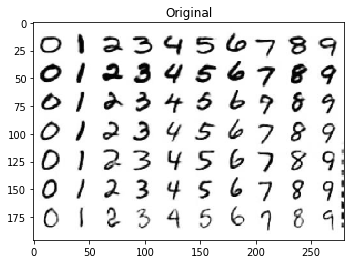

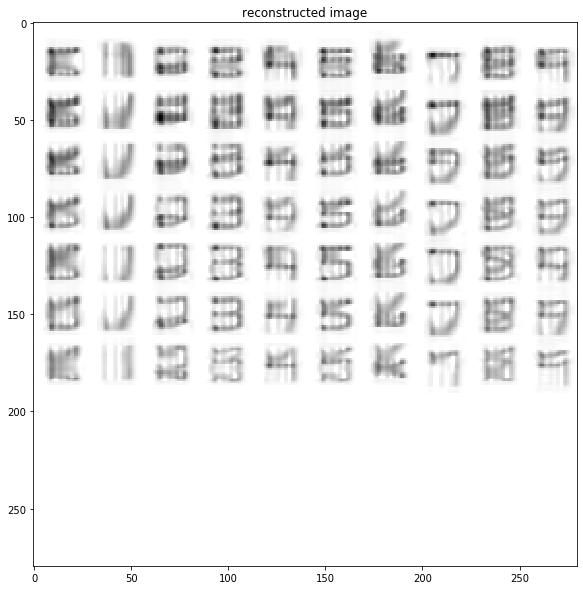

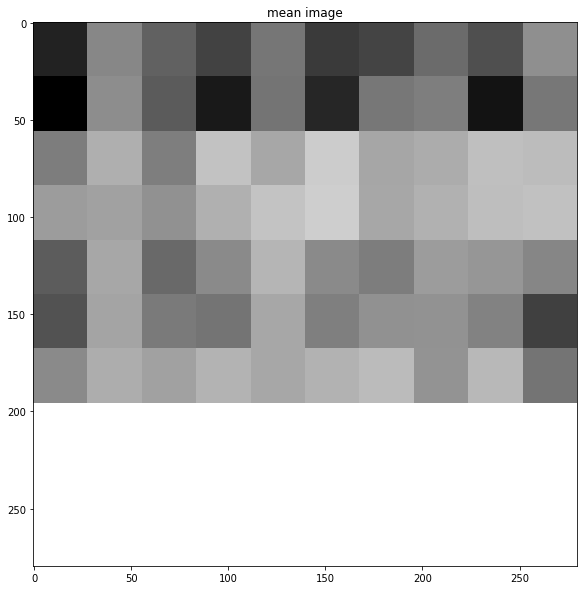

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

from PIL import Image, ImageCms
from pylab import *
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from keras.datasets import mnist
from sklearn.preprocessing import StandardScaler


path='/content/drive/My Drive/Colab Notebooks/test_Image.PNG'
img_f=np.zeros((280,28*10))
img_f_m=np.zeros((280,28*10))
def show_images_s(X_img):
  print(X_img.shape , 'image size')
  w=10
  h=10
  fig=plt.figure(figsize=(3,3),constrained_layout=False)
  columns = 1
  rows = 1
  for i in range(1, columns*rows +1):
      #img = np.random.randint(10, size=(h,w))
      fig.add_subplot(rows, columns, i)
      #plt.imshow(X_img,cmap = 'Greys', interpolation='nearest', clim=(0, 255))
      #plt.subplots_adjust(wspace=01, hspace=0.001)
  plt.imshow(X_img,cmap = 'Greys', interpolation='nearest', clim=(0, 255))
  plt.show()


def sliding_window(image, stepSize, windowSize):
  #stepSize = 50
  print(image.shape , windowSize.shape)
  (w_width, w_height) = (28,28) # window size
  print(image.shape[1], image.shape[0])
  for x in range(0, image.shape[0]  , stepSize):
    for y in range(0, image.shape[1] , stepSize):
        
        #print(x,y,w_width,w_height)
        window = image[x:x + w_width, y:y + w_height]
        #show_images_s(window)
        img_f[x:x + w_width, y:y + w_height]=np.sqrt(np.matmul(window,t_im[1]))
        #show_images_s(np.sqrt(np.matmul(window,t_im[1])))

	# for y in range(0, image.shape[0], stepSize):
	#  for x in range(0, image.shape[1], stepSize):
  #   window = image[x:x + w_width, y:y + w_height, :]
	# 		# yield the current window
	# 		yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])


def sliding_window_mean(image, stepSize, mean_img_5):
  #stepSize = 50
  print(image.shape , mean_img_5.shape)
  (w_width, w_height) = (28,28) # window size
  print(image.shape[1], image.shape[0])
  for x in range(0, image.shape[0]  , stepSize):
    for y in range(0, image.shape[1] , stepSize):
        
        #print(x,y,w_width,w_height)
        window = image[x:x + w_width, y:y + w_height]
        #show_images_s(window)
        img_f_m[x:x + w_width, y:y + w_height]=((window-mean_img_5)**2).sum(axis=-1).sum(axis=-1)

def get_Image(path):
  im = Image.open(path).convert('L')
  return im
image_Src=get_Image(path)
imr=image_Src.resize((280,28*7))
plt.title('Original')
plt.imshow(imr,cmap='Greys')

figure(figsize=(10,10),constrained_layout=False)
plt.title('reconstructed image')
sliding_window(np.asarray(imr),28,t_im[1])
plt.imshow(img_f,cmap='Greys')


figure(figsize=(10,10),constrained_layout=False)
plt.title('mean image')
sliding_window_mean(np.asarray(imr),28,mean_img_5.reshape(28,28))
plt.imshow(img_f_m,cmap='Greys')




(60000,)
(6742, 784)


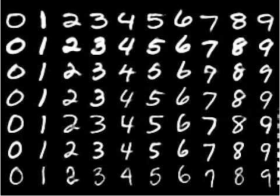

(196, 280)


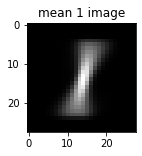

(196, 280) (28, 28)
280 196


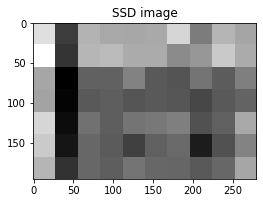

(196, 280) (28, 28)
280 196


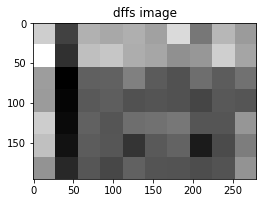

In [63]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

img_f_d=np.zeros((28*7,28*10))
img_f_m=np.zeros((28*7,28*10))



def get_grey_Image(path):

  image = cv2.imread(path)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  width = 280
  height = 28*7
  dim = (width, height)
 
    # resize image
  resized_gray = cv2.resize(gray, dim, interpolation = cv2.INTER_AREA)
  return resized_gray


	# for y in range(0, image.shape[0], stepSize):
	#  for x in range(0, image.shape[1], stepSize):
  #   window = image[x:x + w_width, y:y + w_height, :]
	# 		# yield the current window
	# 		yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])


def sliding_window_mea(image, stepSize, mean_img):
  #stepSize = 50
  print(image.shape , mean_img.shape)
  (w_width, w_height) = (28,28) # window size
  print(image.shape[1], image.shape[0])
  for x in range(0, image.shape[0]  , stepSize):
    for y in range(0, image.shape[1] , stepSize):
        
        #print('dimensions',x:x,y:y,w_width,w_height)
        window = image[x:x + w_width, y:y + w_height]
        #show_images_s(window)
        img_f_m[x:x + w_width, y:y + w_height]=(np.sqrt((window-mean_img)**2)).sum(axis=-1).sum(axis=-1)

def sliding_window_dffs(image, stepSize, mean_img,pc_comp):
  #stepSize = 50
  print(image.shape , mean_img.shape)
  (w_width, w_height) = (28,28) # window size
  print(image.shape[1], image.shape[0])
  for x in range(0, image.shape[0]  , stepSize):
    for y in range(0, image.shape[1] , stepSize):
        
        #print('dimensions',x:x,y:y,w_width,w_height)
        window = image[x:x + w_width, y:y + w_height]
        #show_images_s(window)
        img_f_d[x:x + w_width, y:y + w_height]=(((window-mean_img)**2)-pc_comp).sum(axis=-1).sum(axis=-1)


(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(y_train.shape)
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],num_pixels)
X_test = X_test.reshape(X_test.shape[0],num_pixels)

train_filter = np.where(y_train == 1 )
train_filter_5 = np.where(y_train == 5  )

#scaler = StandardScaler()
X=X_train[train_filter]
X_5=X_train[train_filter_5]
print(X.shape)
mean_1_X = X.mean(axis=0)
mean_5_X=X_5.mean(axis=0)
img=get_grey_Image(path)
cv2_imshow( img)
print(img.shape)

figure(figsize=(2,2),constrained_layout=False)
plt.title('mean 1 image')
plt.imshow(mean_1_X.reshape(28,28), interpolation='nearest')
plt.show()
sliding_window_mea(img,28,mean_1_X.reshape(28,28))
#cv2_imshow(img_f_m.reshape(280,28*10))

figure(figsize=(4,4),constrained_layout=False)
plt.title('SSD image')
plt.imshow(img_f_m, interpolation='nearest')
plt.show()
img_f_m=np.zeros((28*7,280))


# figure(figsize=(4,4),constrained_layout=False)
# plt.title('mean 5 image')
# plt.imshow(mean_5_X.reshape(28,28), interpolation='nearest')
# plt.show()
# sliding_window_mea(img,28,mean_5_X.reshape(28,28))

# figure(figsize=(4,4),constrained_layout=False)
# plt.title('SSD image')
# plt.imshow(img_f_m, interpolation='nearest')
# plt.show()



pca = PCA(n_components=784)
pca.fit(X)
a=pca.components_

pca_component=np.sum(np.square(a))

sliding_window_dffs(img,28,pca.mean_.reshape(28,28),pca_component)

figure(figsize=(4,4),constrained_layout=False)
plt.title('dffs image')
plt.imshow(img_f_d, interpolation='nearest')
plt.show()

(196, 280, 2)
(196, 280, 2)


Text(0.5, 1.0, 'reconstructed image')

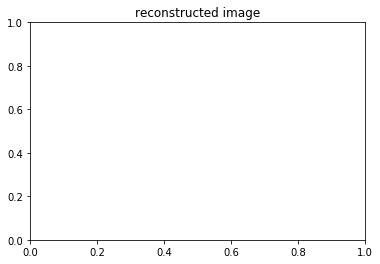

In [31]:
def get_Image(path):
  im = Image.open(path).convert('LA')
  return im
  
def get_Image_L(path):
  im = Image.open(path).convert('L')
  return im

image_Src=get_Image(path)
imr=image_Src.resize((280,28*7))
image_Src_1=get_Image_L(path)
imr1=image_Src.resize((280,28*7))
print(np.asarray(imr).shape)
print(np.asarray(imr1).shape)
plt.title('reconstructed image')
#sliding_window(np.asarray(imr),28,t_im[1])




# while(i<280):
#   left=i
#   upper=i
#   right=28+i
#   lower=28+i
#   print(left,upper, ':',right,upper)
#   print(left,lower,':',right,lower)
#   i+=28
#   area = (left, upper, right, lower) 
#   imr = imr.crop((area))
#   figure()
#   plt.imshow(imr)

# imr = imr.crop((28,28,56,56))
# figure()
# plt.imshow(imr)
# for i in range (0,3):
#   for j in range (0,3):
#     left=i
#     upper=i
#     right=28+j
#     lower=28+j
#     print(left,upper, ':',right,upper)
#     print(left,lower,':',right,lower)
    # area = (left, upper, right, lower) 
    # imr = imr.crop(area)
    # figure()
    # plt.imshow(imr)


# print(np.asarray(imr).shape)


# (X_train, y_train), (X_test, y_test) = mnist.load_data()
# num_pixels = 784
# X_train = X_train.reshape(X_train.shape[0],num_pixels)
# X_test = X_test.reshape(X_test.shape[0],num_pixels)

# train_filter = np.where(y_train == 5)

# X=X_train[train_filter]


# print(X.shape)
# show_images(X)
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# pca = PCA()
# pca.fit(X)
# variance = pca.explained_variance_ratio_ #calculate variance ratios

# var=np.round(pca.explained_variance_, decimals=3)
#print(var)
#print(np.sort(var, axis=None))
#print(len(var))


# plt.ylabel('% Variance Explained')
# plt.xlabel('# of Features')
# plt.title('PCA Analysis')
# plt.ylim(-10,100)
# plt.style.context('seaborn-whitegrid')
# plt.plot(var)


# print('Eigenvalues')
# print(np.round(model.explained_variance_,decimals=1))
# print('Eigenvectors')
# print(np.round(model.components_,decimals=2))

# mean_X = X.mean(axis=0)
# X = X - mean_X
# #print('dim>num_data',dim,num_data)
# # PCA - compact trick used
# M = dot(X,X.T) # covariance matrix
# e,EV = linalg.eigh(M)
# #print(e)
# S = e[::-1]
# #print(S)






(60000,)
test#######33 (5958, 784)
summs 10.000000000000007
10.000000000000005


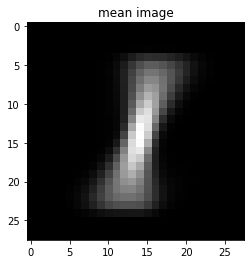

(196, 280) (28, 28)
196


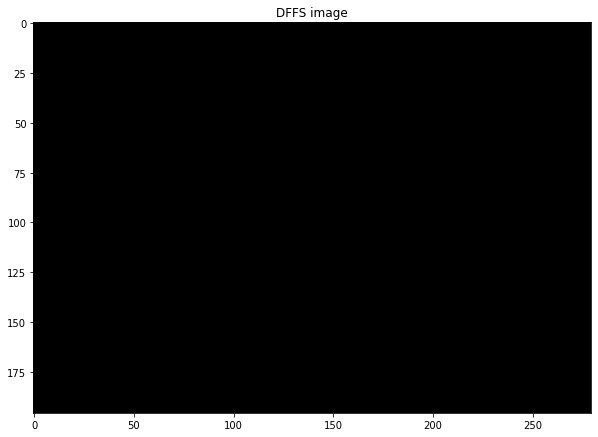

In [53]:

img_f=np.zeros((28*7,28*10))
def sliding_windo(image, stepSize, windowSize):
  #stepSize = 50
  print(image.shape , windowSize.shape)
  (w_width, w_height) = (28,28) # window size
  print( image.shape[0])
  for x in range(0, image.shape[0]  , stepSize):
    for y in range(0, image.shape[1] , stepSize):
        
        #print(x,y,w_width,w_height)
        window = image[x:x + w_width, y:y + w_height]
        #show_images_s(window)
        img_f[x:x + w_width, y:y + w_height]=(((window-windowSize)**2)-pca_component).sum(axis=-1).sum(axis=-1)
        #show_images_s(np.sqrt(np.matmul(window,t_im[1])))


(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],num_pixels)
X_test = X_test.reshape(X_test.shape[0],num_pixels)
print(y_train.shape)
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],num_pixels)
X_test = X_test.reshape(X_test.shape[0],num_pixels)

train_filter = np.where(y_train == 2 )
X_test_1=X_train[train_filter]
X_test_1.reshape(X_test_1.shape[0],28,28)
print('test#######33',X_test_1.shape)

pca = PCA(n_components=10)
pca.fit(X_test_1)
a=pca.components_
comp=np.array([])
for i in range(a.shape[0]):
  comp=np.append(comp,a[i]**2)
summs=np.sum(comp)
print('summs',summs)


pca_component=np.sum(np.square(a))
print(pca_component)
principalComponents = pca.transform(X_test_1)

approximation = pca.inverse_transform(principalComponents)
figure()
plt.title('mean image')
plt.imshow(mean_1_X.reshape(28,28), interpolation='nearest')
plt.show()
sliding_windo(img,28,mean_1_X.reshape(28,28))
figure(figsize=(10,10),constrained_layout=False)
plt.title('DFFS image')
plt.imshow(img_f_m,interpolation='nearest')
plt.show()
img_f_m=np.zeros((28*7,280))


# figure(figsize=(10,10),constrained_layout=False)
# plt.title('mean 5 image')
# plt.imshow(mean_5_X.reshape(28,28), interpolation='nearest')
# plt.show()

#sliding_windo(img,28,mean_5_X.reshape(28,28))

# figure(figsize=(10,10),constrained_layout=False)
# plt.title('SSD image')
# plt.imshow(img_f_m, interpolation='nearest')
# plt.show()

In [0]:
a=[[2,3],[4,5]]
print(np.square(a))